In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the data from github
df=pd.read_csv('https://raw.githubusercontent.com/Asadullah007/PSL-Prediction-/master/PSL_2016-2020.csv')

In [4]:
#let's look at the head of the data
df.head()

,Team_1,Team_2,Team1_Code,Team2_Code,Season,venue,id,Win_By_Wkts,Win_By_Runs,toss_winner,toss_winner_code,toss_decision,result,winner,winner_code
0,ISLAMABAD UNITED,QUETTA GLADIATORS,IU,QG,2016,Dubai,1,8,0,ISLAMABAD UNITED,IU,field,normal,QUETTA GLADIATORS,QG
1,KARACHI KINGS,LAHORE QALANDARS,KK,LQ,2016,Dubai,2,7,0,KARACHI KINGS,KK,field,normal,KARACHI KINGS,KK
2,PESHAWAR ZALMI,ISLAMBAD UNITED,PZ,IU,2016,Dubai,3,0,24,PESHAWAR ZALMI,PZ,field,normal,PESHAWAR ZALMI,PZ
3,QUETTA GLADIATORS,KARACHI KINGS,QG,KK,2016,Dubai,4,8,0,QUETTA GLADIATORS,QG,field,normal,QUETTA GLADIATORS,QG
4,LAHORE QALANDARS,PESHAWAR ZALMI,LQ,PZ,2016,Dubai,5,9,0,PESHAWAR ZALMI,PZ,bat,normal,PESHAWAR ZALMI,PZ


In [5]:
#let's explore the columns of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 15 columns):
Team_1              127 non-null object
Team_2              127 non-null object
Team1_Code          127 non-null object
Team2_Code          127 non-null object
Season              127 non-null int64
venue               127 non-null object
id                  127 non-null int64
Win_By_Wkts         127 non-null int64
Win_By_Runs         127 non-null int64
toss_winner         127 non-null object
toss_winner_code    127 non-null object
toss_decision       127 non-null object
result              127 non-null object
winner              127 non-null object
winner_code         127 non-null object
dtypes: int64(4), object(11)
memory usage: 15.0+ KB


# Data Visualization

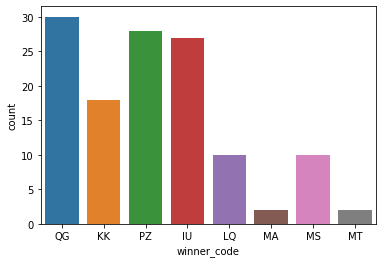

In [6]:
#let's explore which team has won the most of the matches throughout all the seasons
sns.countplot(x='winner_code',data=df)

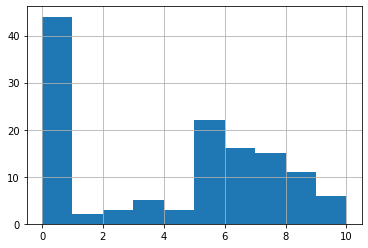

In [35]:
#let's explore how the win by wickets is distributed
df['Win_By_Wkts'].hist()

In [32]:
#seems like we have an ill defined value here
df['Win_By_Wkts'].unique()

array([ 8,  7,  0,  9,  3,  5,  2, 50,  6,  1, 10,  4], dtype=int64)

In [34]:
#as a good guess we know this would we win by 5 wickets and not by 50 let's replace it
df['Win_By_Wkts'].replace(50,5,inplace=True)

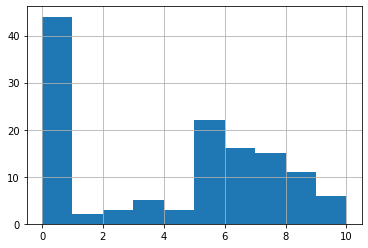

In [38]:
#now let's check again
df['Win_By_Wkts'].hist(bins=10)

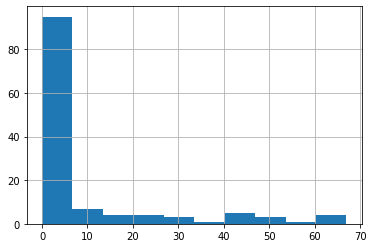

In [44]:
#now similarly let's explore the Win_By_Runs
df['Win_By_Runs'].hist(bins=10)

# Data Exploration

In [20]:
#now let's see how many times has it happened that the winning toss team has also won the match
def tosses_win_matches(cols):
    toss_winner=cols[0]
    match_winner=cols[1]
    if toss_winner==match_winner:
        return True
    else:
        return False
tosses_matches=df[['toss_winner_code','winner_code']].apply(tosses_win_matches,axis=1)
percentage_win=tosses_matches.sum()/len(df) *100
print('The percentage of the team winning the toss also winning the match is',np.round(percentage_win,2))

The percentage of the team winning the toss also winning the match is 52.76


In [26]:
#now as it is the common notion that due to the hot weather, the next to bat team has advantage in the torunament let's see
def bat_second_win(cols):
    toss_winner=cols[0]
    toss_decision=cols[1]
    match_winner=cols[2]
    if toss_decision == 'bat':
        if toss_winner==match_winner:
            return False
        else:
            return True
    if toss_decision == 'field':
        if toss_winner==match_winner:
            return True
        else:
            return False
        
second_to_bat=df[['toss_winner_code','toss_decision','winner_code']].apply(bat_second_win,axis=1)
percentage_win=second_to_bat.sum()/len(df) *100
print('The percentage of the team winning the match and batting next is',np.round(percentage_win,2))

The percentage of the team winning the match and batting next is 51.97


In [73]:
#now based on our data let's find out the winner of all seasons
first=0
second=1
lst=[]
for x in range(len(df)):
    first+=1
    second+=1
    if second == len(df):
        break
    if df['Season'][first] == df['Season'][second]:
        continue
    else: 
        lst.append(df['winner_code'][first])
lst

['IU', 'PZ', 'IU', 'QG']